In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
X=pd.read_csv("Training Data/Linear_X_Train.csv")
y=pd.read_csv("Training Data/Linear_Y_Train.csv")

In [3]:
print(X.head())
# print(X)   
print(X.shape)
# print(X[0])
print(y.head())

          x
0 -0.289307
1 -0.588810
2  1.027507
3 -0.259013
4  0.782043
(3750, 1)
           y
0  -0.091101
1 -53.467721
2  75.457009
3 -12.025286
4  57.414187


In [4]:
X=X.values
y=y.values
print(X)
print(y)

[[-0.28930742]
 [-0.58880963]
 [ 1.02750749]
 ...
 [-0.30516366]
 [ 1.67583291]
 [-0.49175724]]
[[-9.11011171e-02]
 [-5.34677208e+01]
 [ 7.54570088e+01]
 ...
 [-3.49832749e+01]
 [ 1.45206092e+02]
 [-1.71244939e+01]]


In [5]:
print(type(X))
print(X)

<class 'numpy.ndarray'>
[[-0.28930742]
 [-0.58880963]
 [ 1.02750749]
 ...
 [-0.30516366]
 [ 1.67583291]
 [-0.49175724]]


In [6]:
def hypothesis(theta,X):
    return theta[0]+theta[1]*X    #//finally returning a scalar value

In [7]:
def error(X,theta,y):
    steps=X.shape[0]
    avg_error=0
    for i in range(steps):
        y_=hypothesis(X[i],theta)
        avg_error+=(y_-y[i])**2
    return avg_error
    

In [8]:
def gradient(X,theta,y):
    steps=X.shape[0]  #no of rows
    grad=np.zeros((2,))
    for i in range(steps):
        y_=hypothesis(theta,X[i])
        grad[0]=grad[0]+y_-y[i]
        grad[1]=grad[1]+(y_-y[i])*X[i]
    return grad/steps
    

In [9]:
def gradient_descent(X,y,learning_rate=.1,max_steps=100):
    theta=np.zeros((2,)) 
    """assigning arbitirary values of zero to both theta_0 and theta_1  """
#     error_list=[]
#     theta_list=[]
    
    """ we have to minimise the loss function J(theta) ,J_theta is a function of two parameters
    theta_0 and theta_1"""
    
    """error list contains the variation of error and theta_list contains variation of theta"""
    
    for i in range(max_steps):
        grad=gradient(X,theta,y)
#         error=error(X,theta,y)
        """calculating error now for plotting later"""
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
#         theta_list.append((grad[0],grad[1]))   
#         error_list.append(error)
#         return theta,error_list,theta_list
    return theta

In [10]:
# theta,error_list,theta_list=gradient_descent(X,y)
theta=gradient_descent(X,y)

In [11]:
# X=pd.read_csv("Test Cases/Linear_X_Test.csv")
# y=pd.read_csv("Test Cases/sample_submission_linear.csv")
y_=hypothesis(theta,X)

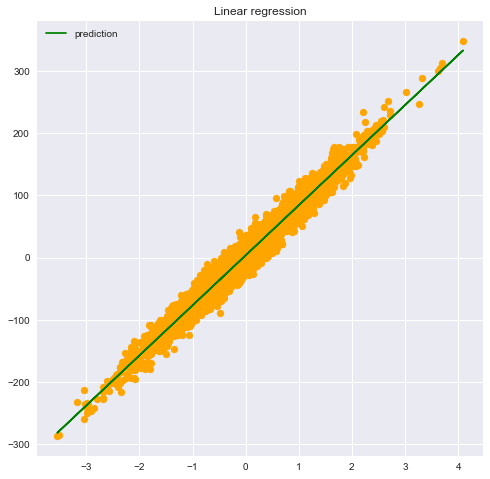

In [12]:
plt.figure(figsize=(8,8))
plt.style.use('seaborn')
plt.plot(X,y_,color="green",label="prediction")
plt.scatter(X,y,color="orange")
plt.legend()
plt.title("Linear regression")
plt.show()

In [14]:
x_test=pd.read_csv("Test Cases/Linear_X_Test.csv").values
print(x_test)

[[-1.87794441]
 [-0.86903192]
 [-2.53018242]
 ...
 [ 0.12800782]
 [-0.27803759]
 [-0.68042543]]


In [15]:
y_pred=hypothesis(theta,x_test)

In [16]:
print(y_pred)

[[-147.52439132]
 [ -66.26570453]
 [-200.05620583]
 ...
 [  14.03673979]
 [ -18.66650943]
 [ -51.07517461]]


In [25]:
df=pd.DataFrame(data=y_pred,columns=["y"])

In [28]:
df.to_csv("y_pred.csv",index=False)